In [4102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from pandas.plotting import scatter_matrix

pd.options.display.max_columns = 99
pd.options.display.max_rows = 99

In [4103]:
dataZAP = pd.read_csv('./data/dataZAP.csv', encoding='utf-8', sep=';', dtype=str ,low_memory=False)
new_data = pd.read_csv('./data/new_scraped_dataZAP.csv', encoding='utf-8', sep=';', dtype=str ,low_memory=False)

data = pd.concat([dataZAP, new_data])

# Tratamento dos dados

In [4104]:
# Informações irrelevantes
data = data.drop(['account.licenseNumber', 'account.name', 'listing.acceptExchange',
                  'listing.address.zipCode', 'listing.advertiserId', 'listing.createdAt', 'listing.updatedAt',
                  'listing.externalId', 'listing.id','listing.isInactive', 'listing.legacyId', 'listing.link', 
                  'listing.portal', 'listing.preview', 'type', 'listing.address.confidence',  'listing.address.level', 'listing.businessTypeContext',
                  'listing.totalAreas', 'listing.unitTypes', 'listing.pricingInfo.rentalTotalPrice', 'listing.address.point.source', 'listing.address.precision', 'listing.address.streetNumber',
                  'listing.pricingInfo.businessType', 'listing.listingType', 'listing.pricingInfo.businessLabel',
                  'listing.propertyType', 'listing.title', 'listing.subtitle', 'listing.displayAddressType',
                  'listing.address.country', 'listing.pricingInfo.isRent', 'listing.publicationType',
                  'listing.pricingInfo.salePrice', 'listing.floors', 'listing.unitsOnTheFloor', 'listing.unitFloor', 'listing.unitSubTypes',
                  'listing.address.street', 'listing.address.zone', 'listing.pricingInfo.price', 'listing.address.point.lat',
                  'listing.address.point.lon', 'listing.amenities'], axis=1)

# Amenities
data = data.drop(['listing.backyard', 'listing.barbgrill' ,	'listing.bathtub', 'listing.fireplace', 'listing.furnished',
                  'listing.garden', 'listing.guestpark', 'listing.gym', 'listing.hottub', 'listing.mountainview', 
                  'listing.partyhall', 'listing.playground', 'listing.pool', 'listing.sauna',
                  'listing.soundproofing', 'listing.sportcourt', 'listing.tenniscourt'], axis=1)

In [4105]:
# Removendo imoveis alugados por temporada
to_remove = data.query('`listing.pricingInfo.period` == "dia" or `listing.pricingInfo.period` == "semana" or `listing.pricingInfo.period` == "ano"')
data = data.drop(to_remove.index)

data = data.drop('listing.pricingInfo.period', axis=1)

In [4106]:
# Removendo linhas duplicadas
data = data.drop_duplicates()

In [4107]:
# Reseta o index da tabela
data.reset_index(inplace=True)
data = data.drop('index', axis=1)

In [4108]:
# Remove imoveis comerciais
data = data.drop(data[data['listing.usageTypes'] == 'COMMERCIAL'].index)
data = data.drop(data[data['listing.usageTypes'] == 'RESIDENTIAL|COMMERCIAL'].index)
data.drop(['listing.usageTypes'], axis=1)

,imvl_type,listing.address.city,listing.address.neighborhood,listing.address.state,listing.bathrooms,listing.bedrooms,listing.description,listing.parkingSpaces,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.rentalPrice,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas
0,apartamentos,São Paulo,Parada Inglesa,São Paulo,1,2,LINDO APARTAMENTO PARADA INGLESA<br><br>2 DORM...,normal,False,50,1.300,50,normal,45
1,apartamentos,Florianópolis,Agronômica,Santa Catarina,3,3,EXCELENTE LOCALIZAÇÃO - TRANQUILIDADE E COMODI...,1,False,1.961,3.600,370,1,140
2,apartamentos,Rio de Janeiro,Recreio Dos Bandeirantes,Rio de Janeiro,3,3,Cód: TIAP32493. Para quem quer morar próximo d...,2,False,835,2.100,244,1,100
3,apartamentos,Campinas,Cambuí,São Paulo,2,1,Apartamento mobiliado para alugar no Cambuí.<b...,1,False,134.437,3.000,90,0,80
4,apartamentos,São Paulo,Ipiranga,São Paulo,3,2,"Alugue rápido, sem fiador e com segurança! Age...",2,False,536,2.600,17,2,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75888,apartamentos,Canoas,Centro,Rio Grande do Sul,1,2,"Apartamento para Aluguel - Centro, 2 Quartos, ...",0,False,265,1.100,71,0,69
75889,apartamentos,Belo Horizonte,Planalto,Minas Gerais,1,2,"Apartamento para Aluguel - Planalto, 2 Quartos...",1,False,411,1.600,100,0,48
75890,apartamentos,Goiânia,Setor Faiçalville,Goiás,1,2,"Apartamento para Aluguel - Setor Faicalville, ...",1,False,326,1.300,59,0,45
75891,apartamentos,São Paulo,Vila Aricanduva,São Paulo,1,2,"Apartamento para Aluguel - Vila Aricanduva, 2 ...",0,False,90,1.350,94,0,39


In [4109]:
data.head(10)

,imvl_type,listing.address.city,listing.address.neighborhood,listing.address.state,listing.bathrooms,listing.bedrooms,listing.description,listing.parkingSpaces,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.rentalPrice,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas,listing.usageTypes
0,apartamentos,São Paulo,Parada Inglesa,São Paulo,1,2,LINDO APARTAMENTO PARADA INGLESA<br><br>2 DORM...,normal,False,50,1.300,50,normal,45,RESIDENTIAL
1,apartamentos,Florianópolis,Agronômica,Santa Catarina,3,3,EXCELENTE LOCALIZAÇÃO - TRANQUILIDADE E COMODI...,1,False,1.961,3.600,370,1,140,RESIDENTIAL
2,apartamentos,Rio de Janeiro,Recreio Dos Bandeirantes,Rio de Janeiro,3,3,Cód: TIAP32493. Para quem quer morar próximo d...,2,False,835,2.100,244,1,100,RESIDENTIAL
3,apartamentos,Campinas,Cambuí,São Paulo,2,1,Apartamento mobiliado para alugar no Cambuí.<b...,1,False,134.437,3.000,90,0,80,RESIDENTIAL
4,apartamentos,São Paulo,Ipiranga,São Paulo,3,2,"Alugue rápido, sem fiador e com segurança! Age...",2,False,536,2.600,17,2,69,RESIDENTIAL
5,apartamentos,Rio de Janeiro,Barra da Tijuca,Rio de Janeiro,1,2,O apartamento no bairro Barra da Tijuca tem 64...,1,False,809,2.500,236,1,64,RESIDENTIAL
6,apartamentos,São Paulo,Brooklin,São Paulo,2,1,"Alugue rápido, sem fiador e com segurança! Age...",1,False,880,4.900,109,1,67,RESIDENTIAL
7,apartamentos,São Paulo,Tatuapé,São Paulo,2,2,"Amplo apartamento com piso laminado, cozinha e...",1,False,800,1.900,132,1,73,RESIDENTIAL
8,apartamentos,São José do Rio Preto,Jardim Panorama,São Paulo,2,2,Atualizado em,1,False,450,1.400,73,2,70,RESIDENTIAL
9,apartamentos,Porto Alegre,Jardim Botânico,Rio Grande do Sul,1,2,Excelente apartamento com pintura e synteko no...,0,False,260,1.000,30,0,52,RESIDENTIAL


In [4110]:
# Remove o "." da string para preservar o valor correto na conversão para float e converte para valores numéricos

data['listing.pricingInfo.monthlyCondoFee'] = data['listing.pricingInfo.monthlyCondoFee'].str.replace('.', '')
data['listing.pricingInfo.rentalPrice'] = data['listing.pricingInfo.rentalPrice'].str.replace('.', '')
data['listing.usableAreas'] = data['listing.usableAreas'].str.replace('.', '')
data['listing.pricingInfo.yearlyIptu'] = data['listing.pricingInfo.yearlyIptu'].str.replace('.', '')

# errors='coerce' - Os valores 'normal' são convertidos em 'NaN'
data['listing.usableAreas'] = pd.to_numeric(data['listing.usableAreas'], errors='coerce')

data['listing.pricingInfo.monthlyCondoFee'] = pd.to_numeric(data['listing.pricingInfo.monthlyCondoFee'], errors='coerce')
data['listing.pricingInfo.rentalPrice'] = pd.to_numeric(data['listing.pricingInfo.rentalPrice'], errors='coerce')
data['listing.pricingInfo.yearlyIptu'] = pd.to_numeric(data['listing.pricingInfo.yearlyIptu'], errors='coerce')

# data['listing.address.point.lat'] = pd.to_numeric(data['listing.address.point.lat'],errors='coerce')
# data['listing.address.point.lon'] = pd.to_numeric(data['listing.address.point.lon'],errors='coerce')

data['listing.suites'] = pd.to_numeric(data['listing.suites'], errors = 'coerce')
data['listing.bedrooms'] = pd.to_numeric(data['listing.bedrooms'], errors='coerce')
data['listing.bathrooms'] = pd.to_numeric(data['listing.bathrooms'], errors='coerce')
data['listing.parkingSpaces'] = pd.to_numeric(data['listing.parkingSpaces'], errors = 'coerce')

# Booleano
data['listing.pricingInfo.isSale'] = data['listing.pricingInfo.isSale'].astype(bool)


/tmp/ipykernel_5258/3569676157.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['listing.pricingInfo.monthlyCondoFee'] = data['listing.pricingInfo.monthlyCondoFee'].str.replace('.', '')
/tmp/ipykernel_5258/3569676157.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['listing.pricingInfo.rentalPrice'] = data['listing.pricingInfo.rentalPrice'].str.replace('.', '')
/tmp/ipykernel_5258/3569676157.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['listing.usableAreas'] = data['listing.usableAreas'].str.r

In [4111]:
data.head(10)

,imvl_type,listing.address.city,listing.address.neighborhood,listing.address.state,listing.bathrooms,listing.bedrooms,listing.description,listing.parkingSpaces,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.rentalPrice,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas,listing.usageTypes
0,apartamentos,São Paulo,Parada Inglesa,São Paulo,1.0,2.0,LINDO APARTAMENTO PARADA INGLESA<br><br>2 DORM...,NaN,True,50.0,1300,50.0,NaN,45.0,RESIDENTIAL
1,apartamentos,Florianópolis,Agronômica,Santa Catarina,3.0,3.0,EXCELENTE LOCALIZAÇÃO - TRANQUILIDADE E COMODI...,1.0,True,1961.0,3600,370.0,1.0,140.0,RESIDENTIAL
2,apartamentos,Rio de Janeiro,Recreio Dos Bandeirantes,Rio de Janeiro,3.0,3.0,Cód: TIAP32493. Para quem quer morar próximo d...,2.0,True,835.0,2100,244.0,1.0,100.0,RESIDENTIAL
3,apartamentos,Campinas,Cambuí,São Paulo,2.0,1.0,Apartamento mobiliado para alugar no Cambuí.<b...,1.0,True,134437.0,3000,90.0,0.0,80.0,RESIDENTIAL
4,apartamentos,São Paulo,Ipiranga,São Paulo,3.0,2.0,"Alugue rápido, sem fiador e com segurança! Age...",2.0,True,536.0,2600,17.0,2.0,69.0,RESIDENTIAL
5,apartamentos,Rio de Janeiro,Barra da Tijuca,Rio de Janeiro,1.0,2.0,O apartamento no bairro Barra da Tijuca tem 64...,1.0,True,809.0,2500,236.0,1.0,64.0,RESIDENTIAL
6,apartamentos,São Paulo,Brooklin,São Paulo,2.0,1.0,"Alugue rápido, sem fiador e com segurança! Age...",1.0,True,880.0,4900,109.0,1.0,67.0,RESIDENTIAL
7,apartamentos,São Paulo,Tatuapé,São Paulo,2.0,2.0,"Amplo apartamento com piso laminado, cozinha e...",1.0,True,800.0,1900,132.0,1.0,73.0,RESIDENTIAL
8,apartamentos,São José do Rio Preto,Jardim Panorama,São Paulo,2.0,2.0,Atualizado em,1.0,True,450.0,1400,73.0,2.0,70.0,RESIDENTIAL
9,apartamentos,Porto Alegre,Jardim Botânico,Rio Grande do Sul,1.0,2.0,Excelente apartamento com pintura e synteko no...,0.0,True,260.0,1000,30.0,0.0,52.0,RESIDENTIAL


In [4112]:
# Cria uma coluna ALUGUEL na primeira posição para substituir a coluna listing.pricingInfo.rentalPrice
data.insert(0, 'ALUGUEL', data['listing.pricingInfo.rentalPrice'] )
data.drop('listing.pricingInfo.rentalPrice', axis=1, inplace=True)

## Tratamento de outliers

### Aluguel

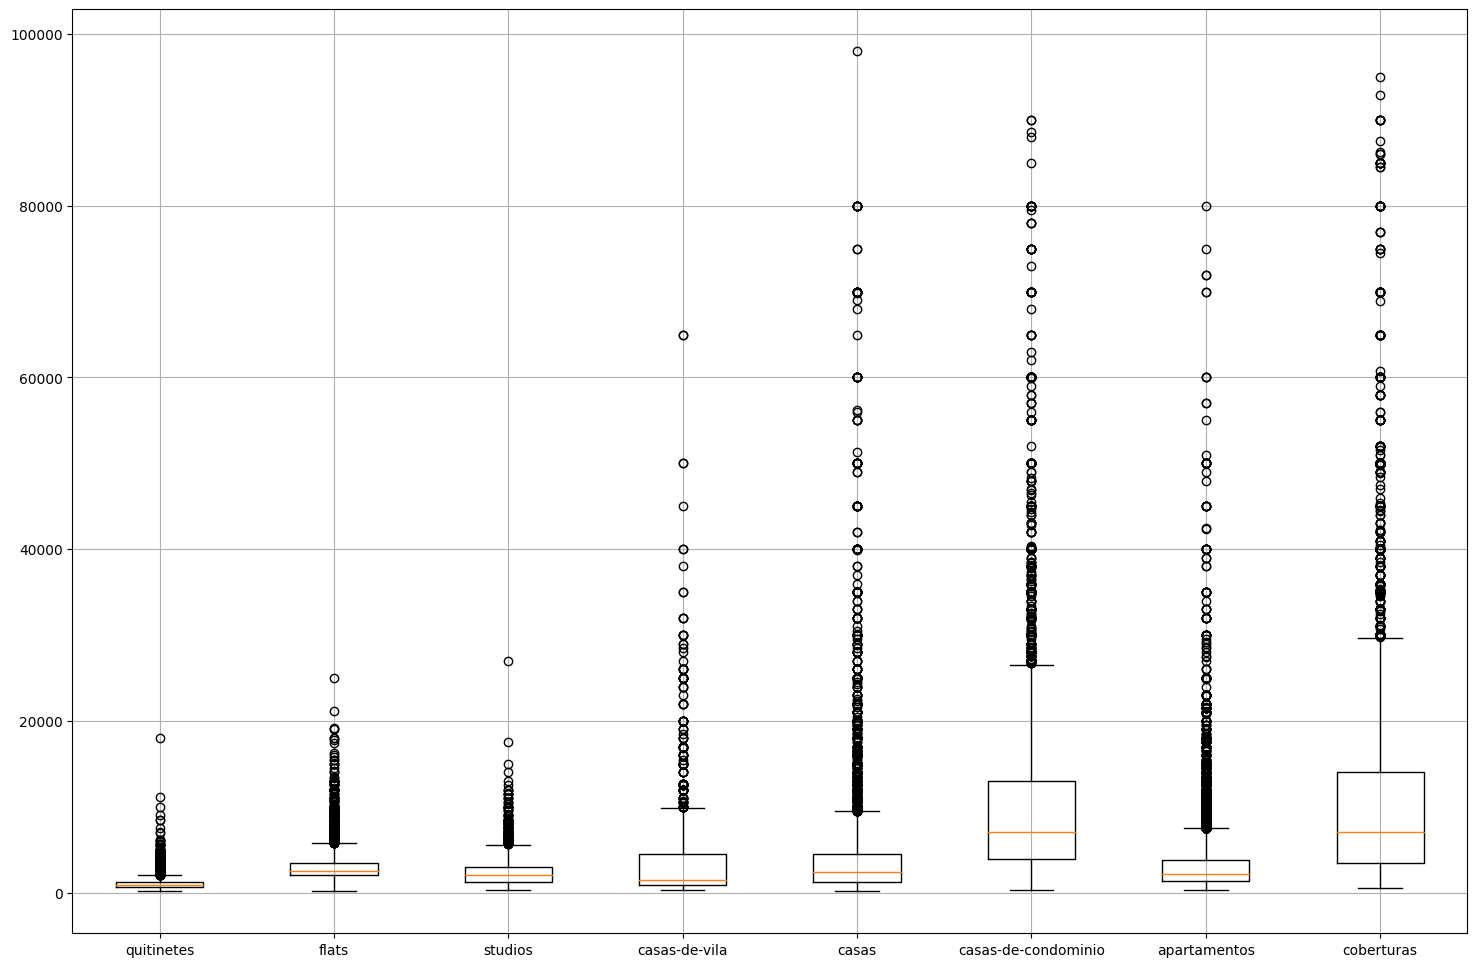

In [4113]:
fig = plt.figure(figsize=(18, 12))
plt.boxplot([data.query('ALUGUEL < 100000 and imvl_type == "quitinetes"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "flat"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "studio"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "casas-de-vila"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "casas"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "casas-de-condominio"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "apartamentos"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "cobertura"')['ALUGUEL']],
            labels=['quitinetes', 'flats', 'studios', 'casas-de-vila', 'casas', 
                    'casas-de-condominio', 'apartamentos', 'coberturas'])
plt.grid()

In [4114]:
data['ALUGUEL'].quantile(0.9)

14000.0

In [4115]:
data.drop(data.query('ALUGUEL > 14000').index, inplace=True)

In [4116]:
data.describe()

,ALUGUEL,listing.bathrooms,listing.bedrooms,listing.parkingSpaces,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas
count,68386.000000,68383.000000,68349.000000,63268.000000,4.644600e+04,4.679200e+04,57562.000000,6.838500e+04
mean,3432.906911,2.035257,2.110989,1.647974,1.049655e+03,6.906485e+02,1.061759,1.589165e+03
std,3048.540673,1.514749,1.198603,2.511301,1.153283e+04,2.150439e+04,1.184757,1.209171e+05
min,150.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000e+00
25%,1200.000000,1.000000,1.000000,1.000000,3.300000e+02,6.800000e+01,0.000000,3.800000e+01
50%,2392.000000,1.000000,2.000000,1.000000,6.000000e+02,1.700000e+02,1.000000,7.000000e+01
75%,4500.000000,3.000000,3.000000,2.000000,1.108000e+03,3.830000e+02,1.000000,1.650000e+02
max,14000.000000,20.000000,30.000000,403.000000,2.058000e+06,2.900000e+06,46.000000,9.999999e+06


Resultado

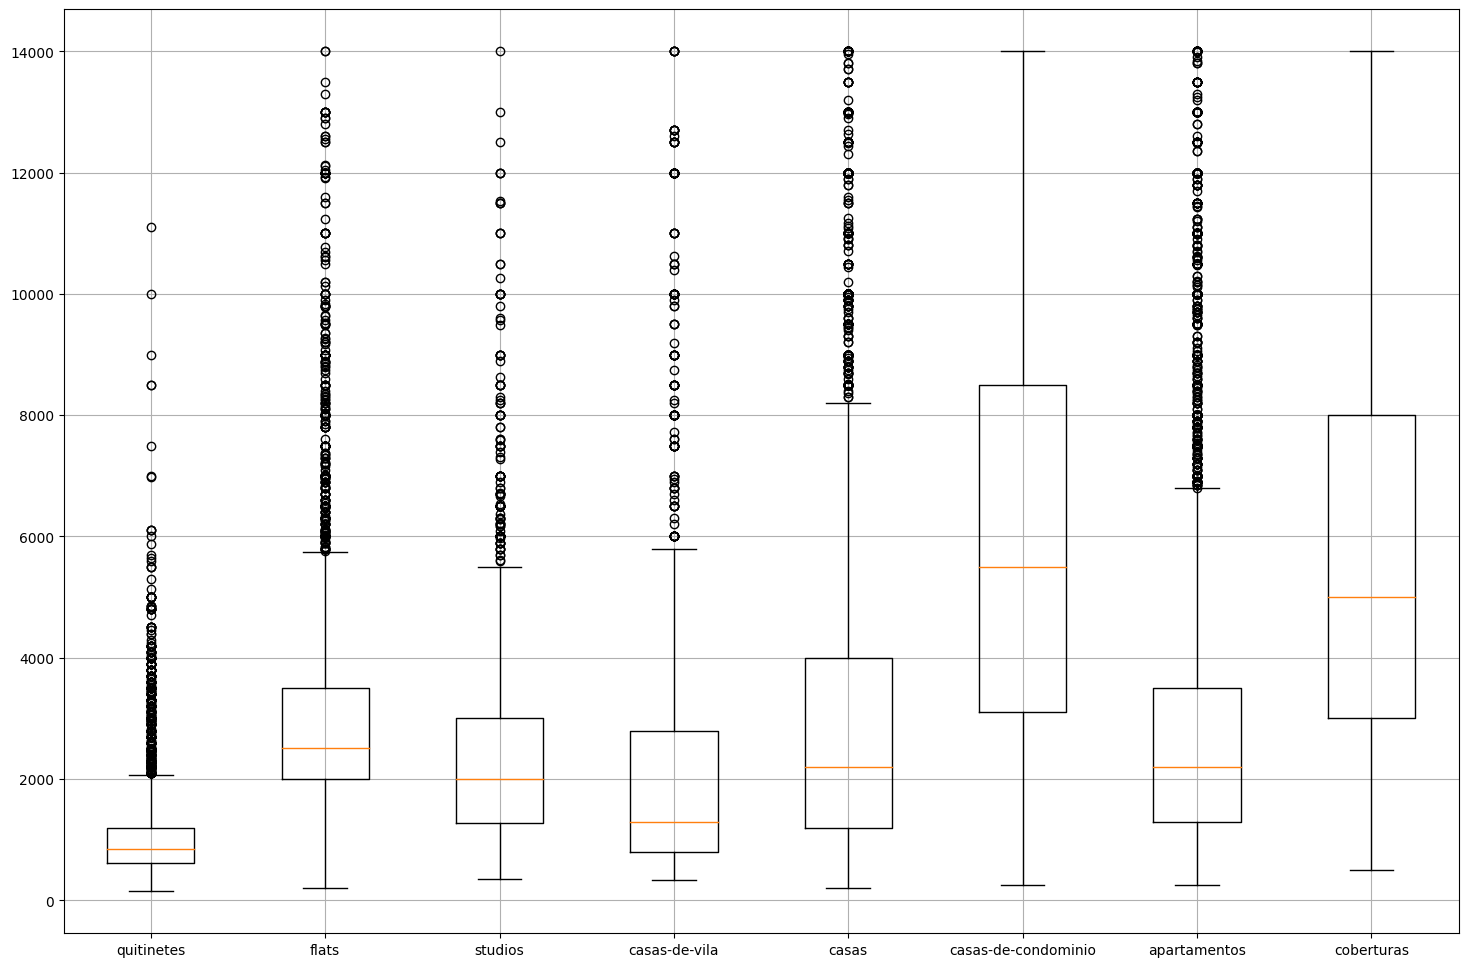

In [4117]:
fig = plt.figure(figsize=(18, 12))
plt.boxplot([data.query('ALUGUEL < 100000 and imvl_type == "quitinetes"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "flat"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "studio"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "casas-de-vila"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "casas"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "casas-de-condominio"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "apartamentos"')['ALUGUEL'],
            data.query('ALUGUEL < 100000 and imvl_type == "cobertura"')['ALUGUEL']],
            labels=['quitinetes', 'flats', 'studios', 'casas-de-vila', 'casas', 
                    'casas-de-condominio', 'apartamentos', 'coberturas'])
plt.grid()

In [4118]:
# verificando os outliers dos quitinetes é possivel observar que não são erros nos valores dos anuncios no ZAP

data.query(' imvl_type == "quitinetes" and ALUGUEL > 6000')[['ALUGUEL','listing.pricingInfo.monthlyCondoFee','listing.address.city','listing.address.neighborhood','listing.bathrooms','listing.bedrooms','listing.parkingSpaces','listing.usableAreas', 'listing.description']].values

array([[6975, 790.0, 'São Paulo', 'Itaim Bibi', 1.0, 1.0, 1.0, 54.0,
        'Mobiliado e equipado, 1suíte, living, cozinha, ar-condicionado, serviço de lavanderia e 1 vaga de garagem. Localizado à 800 metros do Shopping Iguatemi, Parque do Povo e à 300 metros da Avenida Brigadeiro Faria Lima. -'],
       [8500, 1500.0, 'São Paulo', 'Jardim Paulista', 2.0, 2.0, 2.0,
        88.0,
        'Studio Cobertura Duplex totalmente mobiliado, Com duas suítes, sacada ampla com fechamento em vidro, uma vaga de garagem, piso em porcelanato, moveis e eletrodomésticos novos, tudo planejado para atender você. Localizado à poucos metros do Parque do Ibirapuera. Áreas comuns totalmente mobiliadas e decoradas, contando com serviço de arrumação e lavanderia "pay per use", além de estacionamento com manobrista. Amplo fitness, piscina com pequena raia, áreas ajardinadas com paisagismo de Gil Fialho, lounge para festas e espaço gourmet completo, home office e lavanderia coletiva (HVB). O charme e a exclusiv

### Condomínio

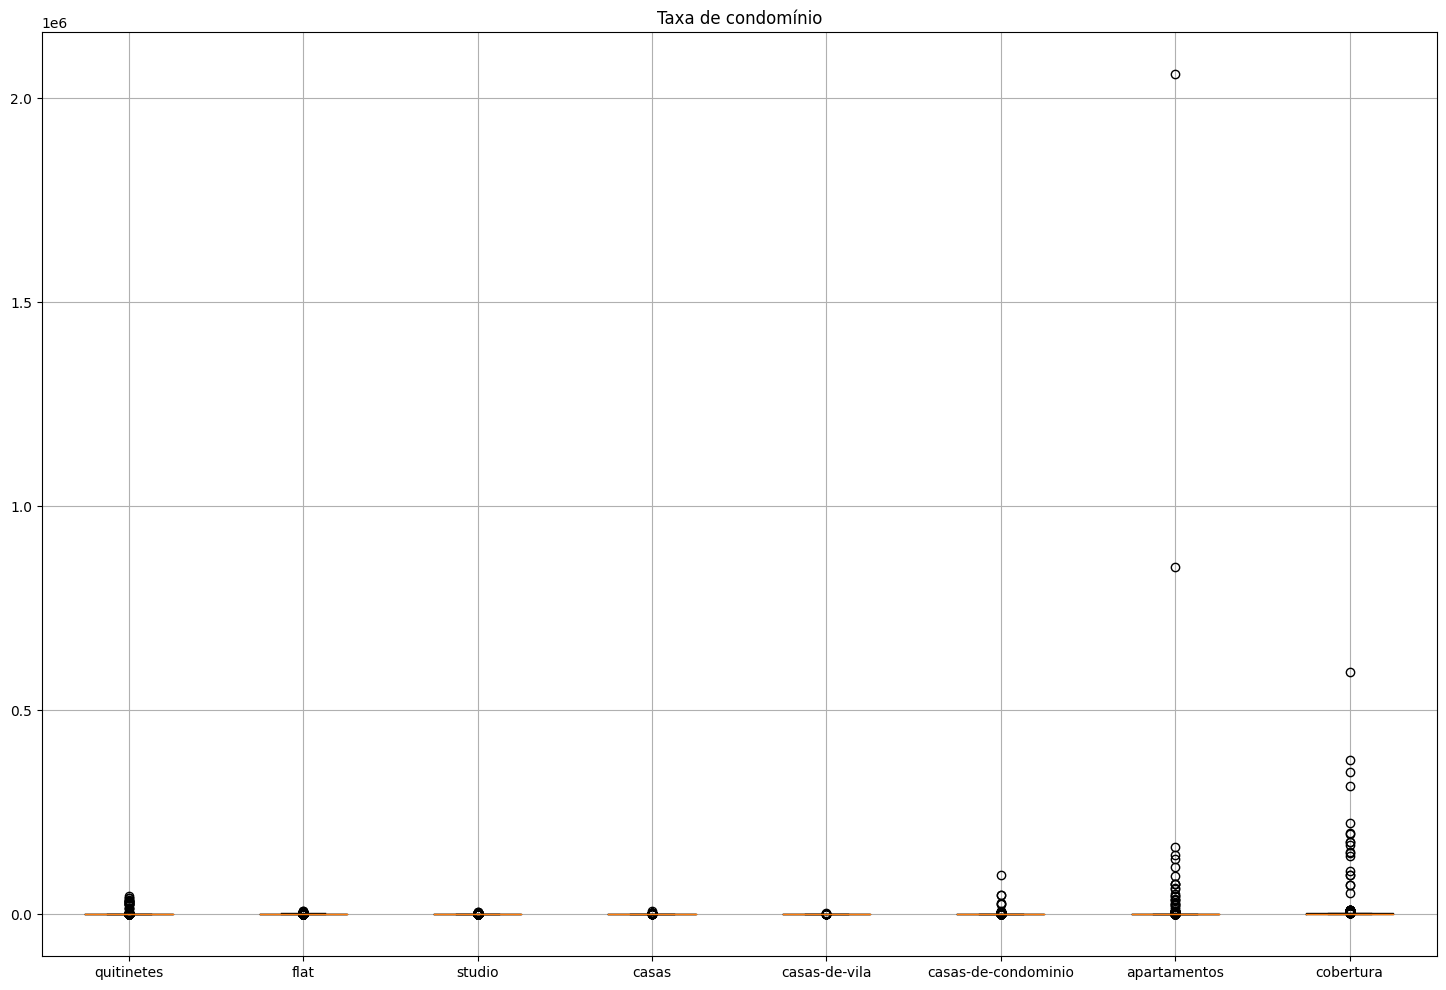

In [4119]:
fig = plt.figure(figsize=(18, 12))
plt.boxplot( [data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "quitinetes"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "flat"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "studio"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "casas"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "casas-de-vila"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "apartamentos"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "cobertura"')['listing.pricingInfo.monthlyCondoFee']],
             labels=['quitinetes', 'flat', 'studio', 'casas',
                     'casas-de-vila', 'casas-de-condominio',
                     'apartamentos', 'cobertura'])
plt.title('Taxa de condomínio')
plt.grid()
plt.show()

In [4120]:
data['listing.pricingInfo.monthlyCondoFee'].quantile(0.99)

4500.0

In [4121]:
data.drop(data.query('`listing.pricingInfo.monthlyCondoFee` > 5000').index, inplace=True)

Resultado

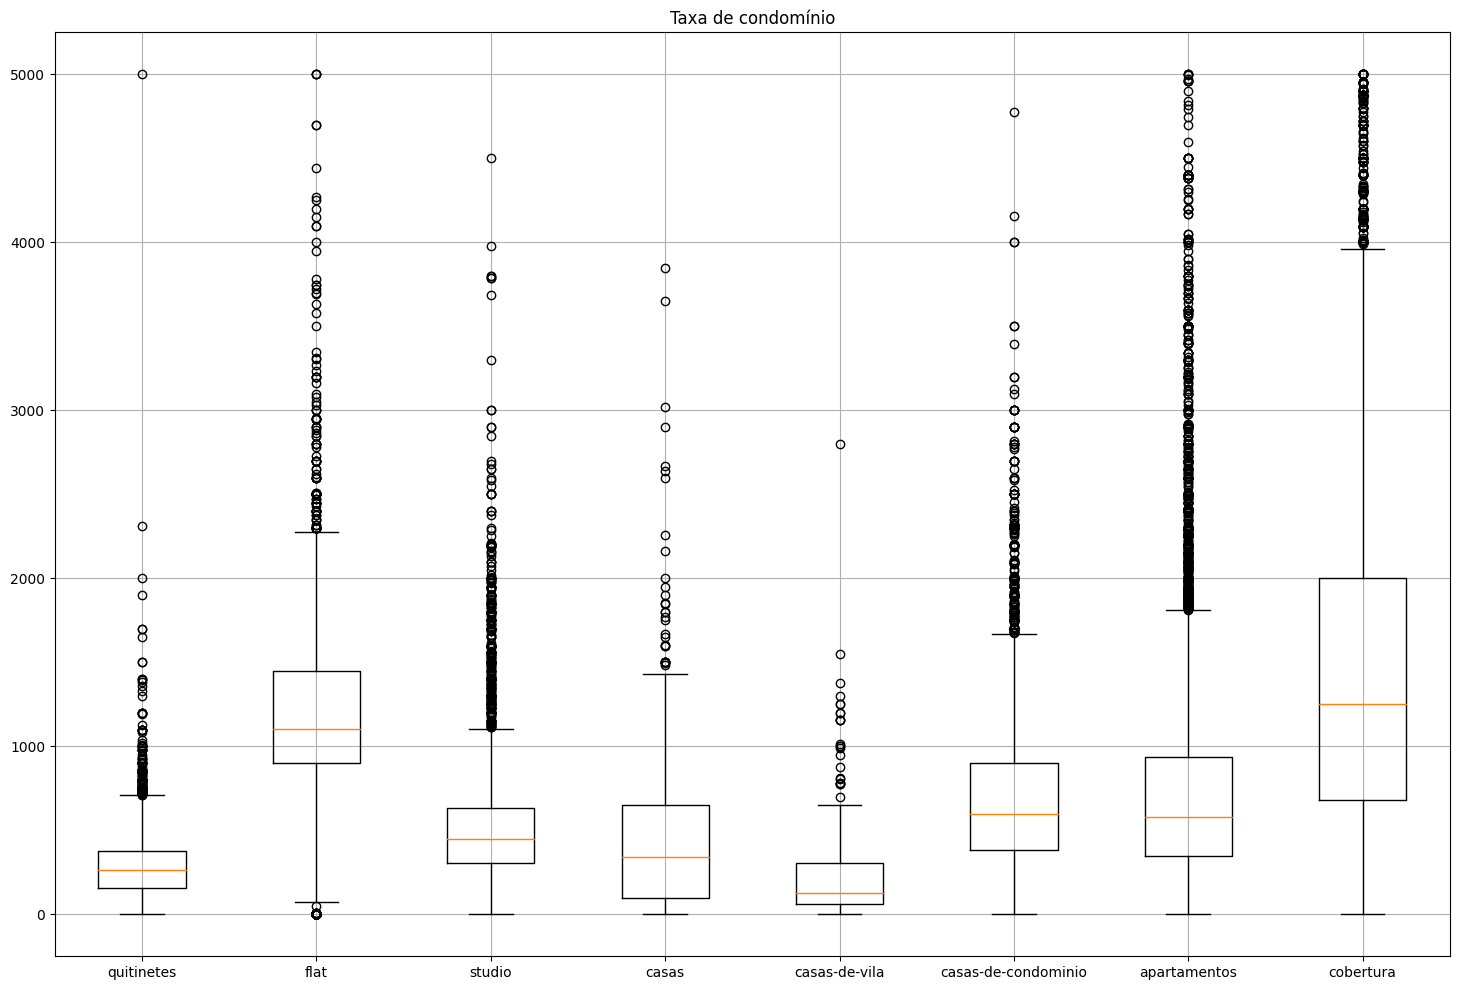

In [4122]:
fig = plt.figure(figsize=(18, 12))
plt.boxplot( [data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "quitinetes"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "flat"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "studio"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "casas"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "casas-de-vila"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "apartamentos"')['listing.pricingInfo.monthlyCondoFee'], 
              data[data['listing.pricingInfo.monthlyCondoFee'].notnull()].query('imvl_type == "cobertura"')['listing.pricingInfo.monthlyCondoFee']],
             labels=['quitinetes', 'flat', 'studio', 'casas',
                     'casas-de-vila', 'casas-de-condominio',
                     'apartamentos', 'cobertura'])
plt.title('Taxa de condomínio')
plt.grid()
plt.show()

In [4123]:
# verificando os outliers é possivel observar que não são erros nos valores dos anuncios no ZAP

data.query('`listing.pricingInfo.monthlyCondoFee` > 3000')[['ALUGUEL','listing.pricingInfo.monthlyCondoFee','listing.address.city','listing.address.neighborhood','listing.bathrooms','listing.bedrooms','listing.parkingSpaces','listing.usableAreas', 'listing.description']].values

array([[12500, 3800.0, 'Rio de Janeiro', ..., 2.0, 260.0,
        '260m2 – apartamento de esquina com vista lateral mar e Jardim de Alah - prédio com grade, câmeras e portaria 24hs, 1 por andar – 2 vagas. Planta circular, claro e ventilado. Pintado e sintecado. Amplo salão com vista, lavabo, louceiro. 4 quartos sendo 1 suíte, todos c/ armários e Split. Banheiro social. Espaçosa cozinha, área de serviço e 2 dependências completas. Mobiliado ou não. Split em todos os cômodos.'],
       [3400, 3862.0, 'São Paulo', ..., 4.0, 373.0,
        'Living amplo ambientes integrados: varanda, sala de lareira, sala de jantar e sala de almoço cozinha planejada com despensa. 4 dormitórios com armários e terraços: sendo 3 suítes e mais dormitório com banheiro. A suíte master com hidro, terraço, closet, repletos de armários. 4 vagas demarcadas paralelas e depósito. Edifico possui lazer Completo com muito verde ao redor. Rua Tranquila sem saída e com cancela. -'],
       [5300, 3450.0, 'Rio de Janeiro', 

### Quartos

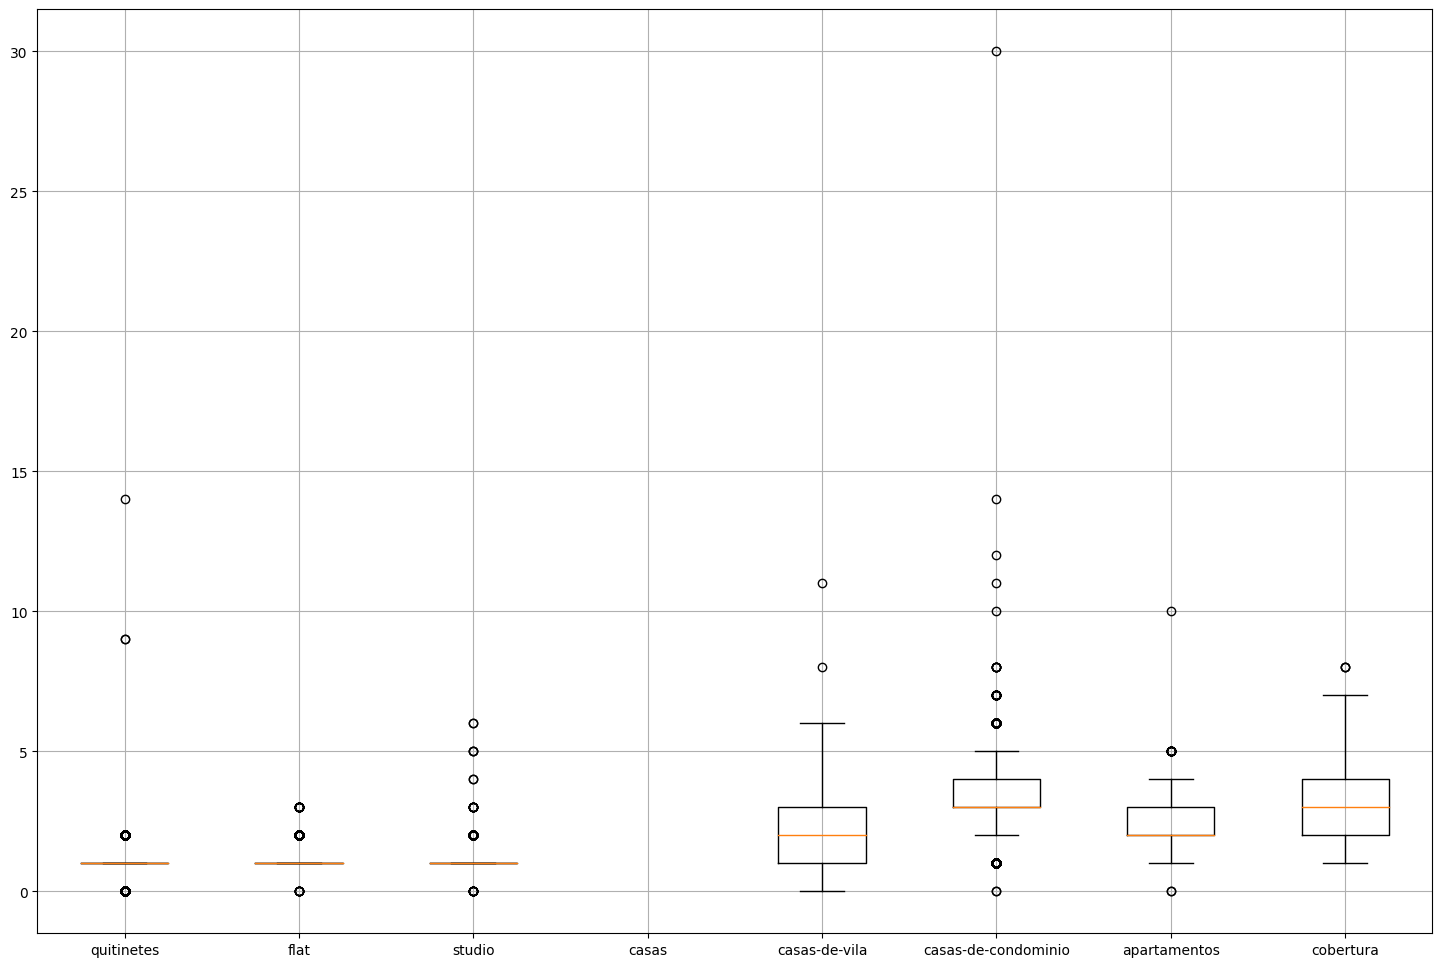

In [4124]:
fig = plt.figure(figsize=(18, 12))
plt.boxplot( [data.query('imvl_type == "quitinetes"')['listing.bedrooms'], 
              data.query('imvl_type == "flat"')['listing.bedrooms'], 
              data.query('imvl_type == "studio"')['listing.bedrooms'], 
              data.query('imvl_type == "casas"')['listing.bedrooms'], 
              data.query('imvl_type == "casas-de-vila"')['listing.bedrooms'], 
              data.query('imvl_type == "casas-de-condominio"')['listing.bedrooms'], 
              data.query('imvl_type == "apartamentos"')['listing.bedrooms'], 
              data.query('imvl_type == "cobertura"')['listing.bedrooms'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas',
                        'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()


In [4125]:
data.query('imvl_type == "quitinetes" and `listing.bedrooms`>5')

,ALUGUEL,imvl_type,listing.address.city,listing.address.neighborhood,listing.address.state,listing.bathrooms,listing.bedrooms,listing.description,listing.parkingSpaces,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas,listing.usageTypes
22730,970,quitinetes,Belo Horizonte,Mangabeiras,Minas Gerais,5.0,9.0,normal,7.0,True,NaN,NaN,5.0,30.0,RESIDENTIAL
22758,1100,quitinetes,São Paulo,Butantã,São Paulo,0.0,14.0,ÓTIMAS SUÍTES NO BUTANTÃ-Jd.Bonfiglioli Dispon...,3.0,True,NaN,NaN,14.0,25.0,RESIDENTIAL
22777,680,quitinetes,Porto Alegre,Partenon,Rio Grande do Sul,3.0,9.0,"""Muitooo"" perto da PUC e UFRGS - Campus do Val...",0.0,True,NaN,NaN,1.0,16.0,RESIDENTIAL


In [4126]:
# Remove quitinetes com mais que 5 quartos já que são erros nos dados

data.drop(data.query('imvl_type == "quitinetes" and `listing.bedrooms`>5').index, inplace=True)

### Banheiros

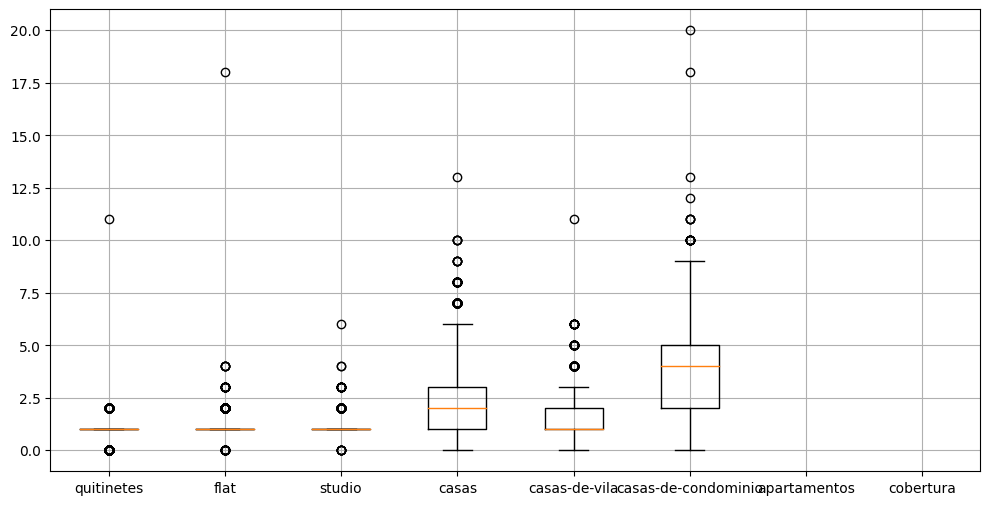

In [4127]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data.query('imvl_type == "quitinetes"')['listing.bathrooms'], 
              data.query('imvl_type == "flat"')['listing.bathrooms'], 
              data.query('imvl_type == "studio"')['listing.bathrooms'], 
              data.query('imvl_type == "casas"')['listing.bathrooms'], 
              data.query('imvl_type == "casas-de-vila"')['listing.bathrooms'], 
              data.query('imvl_type == "casas-de-condominio"')['listing.bathrooms'], 
              data.query('imvl_type == "apartamentos"')['listing.bathrooms'], 
              data.query('imvl_type == "cobertura"')['listing.bathrooms'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas',
                     'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()

In [4128]:
data.drop(data.query('imvl_type == "quitinetes" and `listing.bathrooms`>5').index, inplace=True)
data.drop(data.query('imvl_type == "flat" and `listing.bathrooms`>5').index, inplace=True)

### Suites

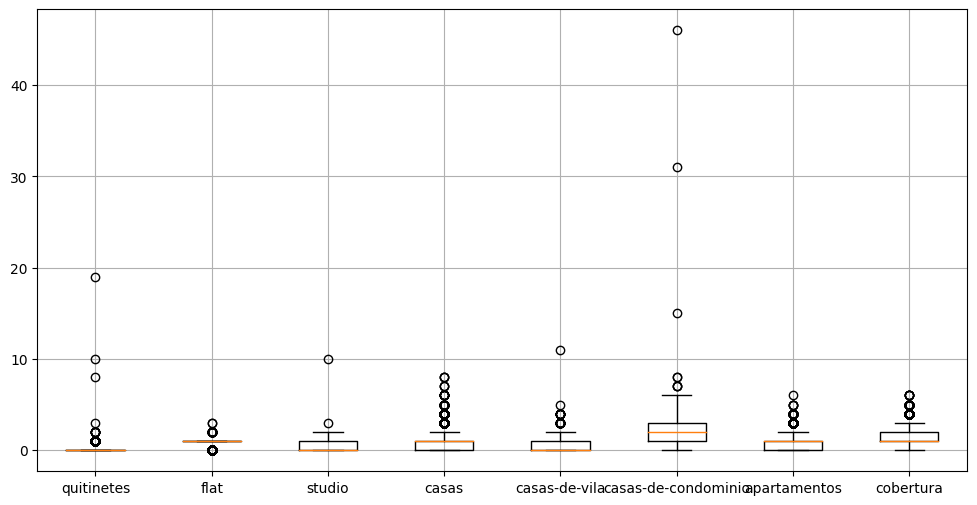

In [4129]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.suites'].notnull()].query('imvl_type == "quitinetes"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "flat"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "studio"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas-de-vila"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "apartamentos"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "cobertura"')['listing.suites'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()   
plt.show()

In [4130]:
data.query('`listing.suites` > 10')

,ALUGUEL,imvl_type,listing.address.city,listing.address.neighborhood,listing.address.state,listing.bathrooms,listing.bedrooms,listing.description,listing.parkingSpaces,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas,listing.usageTypes
5234,5500,casas-de-condominio,Rio de Janeiro,Recreio Dos Bandeirantes,Rio de Janeiro,6.0,4.0,CCO1155- Condomínio Nova Barra - Alugamos ótim...,2.0,True,850.0,400.0,46.0,280.0,RESIDENTIAL
45459,350,quitinetes,Fortaleza,Benfica,Ceará,1.0,1.0,O kitnet/conjugado está localizado no bairro F...,0.0,True,NaN,30.0,19.0,22.0,RESIDENTIAL
52717,2500,casas-de-vila,Campo Grande,Vila Manoel Taveira,Mato Grosso do Sul,11.0,11.0,Aluguel facilitado sem fiador<br>A casa de vil...,1.0,True,NaN,NaN,11.0,182.0,RESIDENTIAL
53295,9900,casas-de-condominio,Goiânia,Jardim Florença,Goiás,6.0,4.0,"+ Residência de esquina, localizado na Alameda...",4.0,True,NaN,1.0,31.0,339.0,RESIDENTIAL
54746,12000,casas-de-condominio,Tremembé,Guedes,São Paulo,18.0,30.0,A casa de condomínio está localizado no bairro...,24.0,True,101.0,380.0,15.0,1058.0,RESIDENTIAL


In [4131]:
data.query('`listing.suites` > 10').values

array([[5500, 'casas-de-condominio', 'Rio de Janeiro',
        'Recreio Dos Bandeirantes', 'Rio de Janeiro', 6.0, 4.0,
        'CCO1155- Condomínio Nova Barra - Alugamos ótima casa com 4 suítes, sala de estar, sala de jantar, lavabo, escritório, cozinha, dependência de empregada e área de serviço.Armários planejados em todos os ambientes.Infraestrutura: piscina e churrasqueira.Segurança 24 horas.',
        2.0, True, 850.0, 400.0, 46.0, 280.0, 'RESIDENTIAL'],
       [350, 'quitinetes', 'Fortaleza', 'Benfica', 'Ceará', 1.0, 1.0,
        'O kitnet/conjugado está localizado no bairro Farias Brito tem 22 metros quadrados com 1 quarto sendo 19 suites e 19 banheiros<br>Possui espaço jardinado.<br>Além disso segurança garantida 24 horas por dia.Encontra-se em um condomínio protegido por muros.<br><br>Rua: Princesa Isabel, N° 1749',
        0.0, True, nan, 30.0, 19.0, 22.0, 'RESIDENTIAL'],
       [2500, 'casas-de-vila', 'Campo Grande', 'Vila Manoel Taveira ',
        'Mato Grosso do Sul', 11.0

In [4132]:
data.at[5247, 'listing.suites'] = 4
data.at[53905, 'listing.suites'] = 3
data.at[45887, 'listing.suites'] = 1

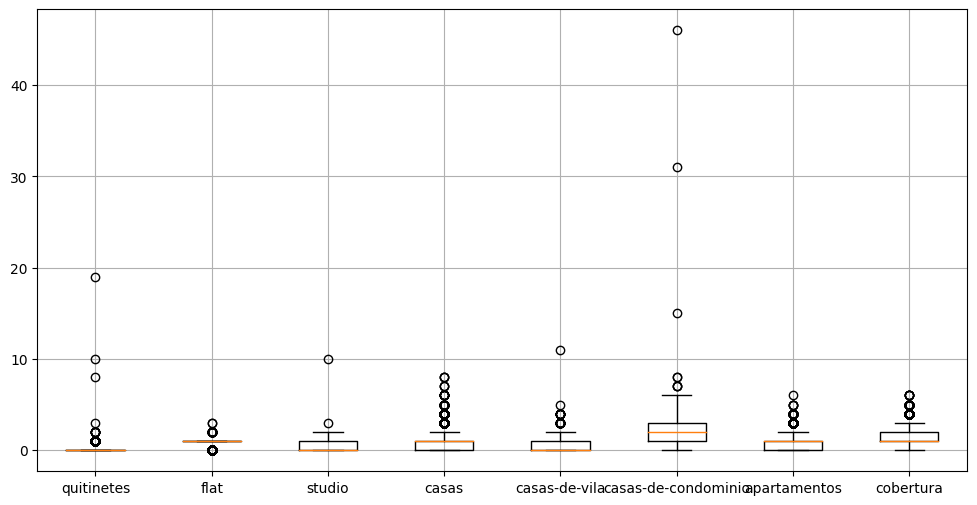

In [4133]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.suites'].notnull()].query('imvl_type == "quitinetes"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "flat"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "studio"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas-de-vila"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "apartamentos"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "cobertura"')['listing.suites'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()   
plt.show()

In [4134]:
data.query('imvl_type == "quitinetes" and `listing.suites`> 2')['listing.suites']

19037    10.0
41097     3.0
42292     8.0
45459    19.0
Name: listing.suites, dtype: float64

In [4135]:
# lendo a descrição do anuncio eles possuem apenas 1 suite

data.at[19324, 'listing.suites'] = 1
data.at[41479, 'listing.suites'] = 1
data.at[42680, 'listing.suites'] = 1

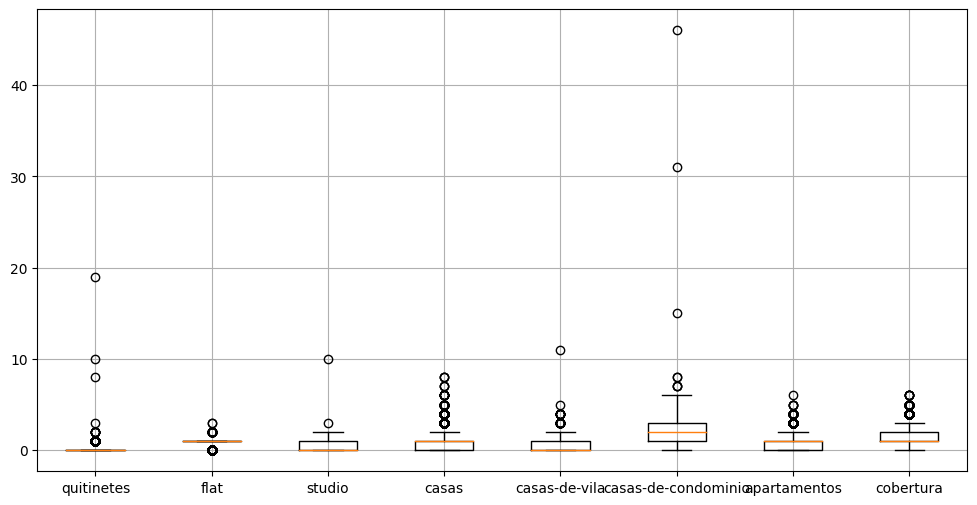

In [4136]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.suites'].notnull()].query('imvl_type == "quitinetes"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "flat"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "studio"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas-de-vila"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "apartamentos"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "cobertura"')['listing.suites'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()   
plt.show()

In [4137]:
data.query('imvl_type == "studio" and `listing.suites`> 4')

,ALUGUEL,imvl_type,listing.address.city,listing.address.neighborhood,listing.address.state,listing.bathrooms,listing.bedrooms,listing.description,listing.parkingSpaces,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas,listing.usageTypes
48267,570,studio,Goiânia,Setor Sol Nascente,Goiás,1.0,1.0,Locação direta com Proprietário sem muita buro...,1.0,True,NaN,NaN,10.0,35.0,RESIDENTIAL


In [4138]:
# Pelo tamanho e valor estou assumindo que seja 1 suite
data.at[48757, 'listing.suites'] = 1

Resultado

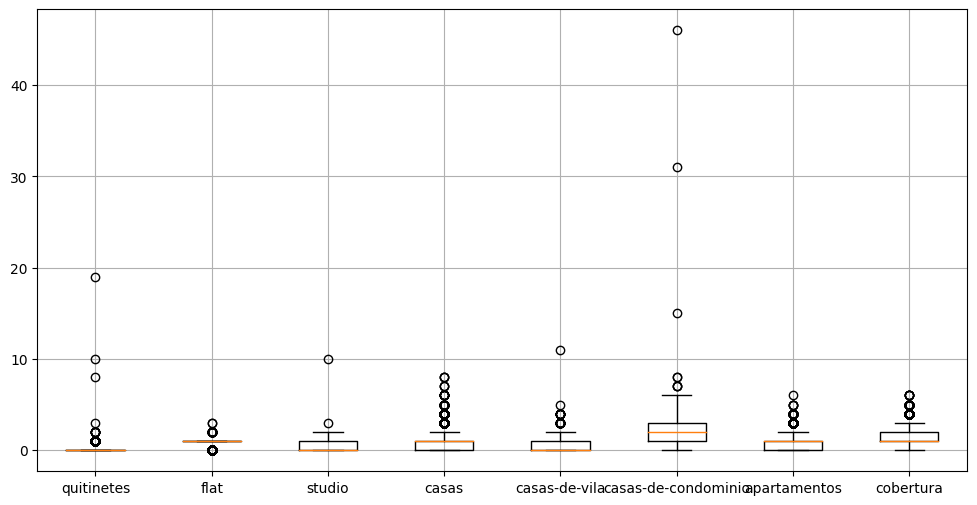

In [4139]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.suites'].notnull()].query('imvl_type == "quitinetes"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "flat"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "studio"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas-de-vila"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "apartamentos"')['listing.suites'], 
              data[data['listing.suites'].notnull()].query('imvl_type == "cobertura"')['listing.suites'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()   

### Área útil

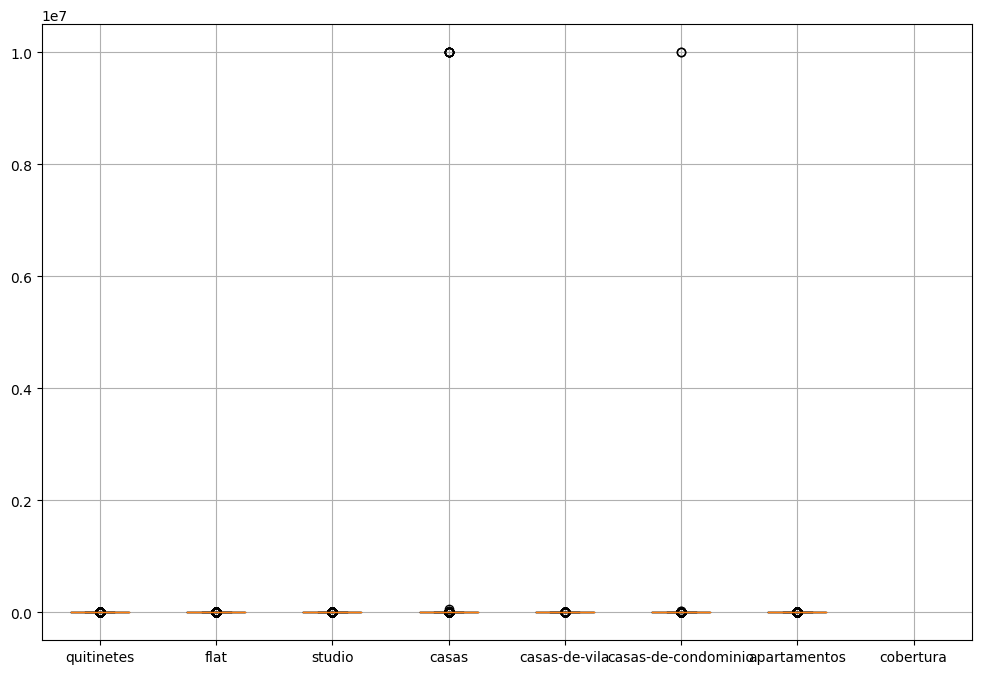

In [4140]:
fig = plt.figure(figsize=(12, 8))
plt.boxplot([data.query('imvl_type == "quitinetes"')['listing.usableAreas'],
             data.query('imvl_type == "flat"')['listing.usableAreas'],
             data.query('imvl_type == "studio"')['listing.usableAreas'],
             data.query('imvl_type == "casas"')['listing.usableAreas'],
             data.query('imvl_type == "casas-de-vila"')['listing.usableAreas'],
             data.query('imvl_type == "casas-de-condominio"')['listing.usableAreas'],
             data.query('imvl_type == "apartamentos"')['listing.usableAreas'],
             data.query('imvl_type == "cobertura"')['listing.usableAreas'], ],
            labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura']
            )
plt.grid()

In [4141]:
data.query('`listing.usableAreas` > 10000')

,ALUGUEL,imvl_type,listing.address.city,listing.address.neighborhood,listing.address.state,listing.bathrooms,listing.bedrooms,listing.description,listing.parkingSpaces,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas,listing.usageTypes
5192,3800,casas-de-condominio,Limeira,normal,São Paulo,2.0,3.0,"03 dormitórios, sendo 03 suites, sala com 2 am...",2.0,True,330.0,NaN,3.0,9999999.0,RESIDENTIAL
7527,1700,casas,Limeira,Vila Queiroz,São Paulo,1.0,3.0,"03 dormitorios c armarios sendo 01 suite, sala...",2.0,True,NaN,NaN,1.0,9999999.0,RESIDENTIAL
8379,900,casas,Limeira,Vila Piza,São Paulo,1.0,3.0,"03 dormitorios, sala, copa, cozinha, banheiro ...",1.0,True,NaN,NaN,NaN,9999999.0,RESIDENTIAL
8439,1100,casas,Limeira,normal,São Paulo,1.0,3.0,"03 dormitórios, sala, cozinha e área de serviç...",1.0,True,NaN,NaN,NaN,9999999.0,RESIDENTIAL
8451,1200,casas,Limeira,Jardim Piratininga,São Paulo,1.0,3.0,"03 dormitórios c armarios sendo uma suite, sal...",1.0,True,NaN,NaN,1.0,9999999.0,RESIDENTIAL
9092,2300,casas,Limeira,Jardim Montezuma,São Paulo,1.0,3.0,"03 dormitórios c armários, sendo 01 suite, 02 ...",3.0,True,NaN,NaN,1.0,9999999.0,RESIDENTIAL
9113,2000,casas,Rio Branco,Alto Alegre \t,Acre,2.0,3.0,"Aluguel: 2.000,00 / mês<br>Total: 2.000,00 / m...",10.0,True,NaN,NaN,1.0,20000.0,RESIDENTIAL
9196,800,casas,Limeira,Jardim Ouro Verde,São Paulo,1.0,1.0,"01 dormitorio, sala, cozinha, área de serviço,...",1.0,True,NaN,NaN,NaN,9999999.0,RESIDENTIAL
9363,400,casas,Limeira,Jardim Ouro Verde,São Paulo,1.0,1.0,"01 dormitório, sala, cozinha, área de serviço,...",0.0,True,NaN,NaN,NaN,9999999.0,RESIDENTIAL
10026,2100,casas,Limeira,Centro,São Paulo,1.0,2.0,"02 dormitorios, sala, cozinha, area de serviço...",1.0,True,NaN,NaN,NaN,9999999.0,RESIDENTIAL


In [4142]:
for index, item in data[data['listing.usableAreas'] > 10000].iterrows():
    if ('m²' or 'm2') in item['listing.description']:
        print(index, item['listing.description'])

9113 Aluguel: 2.000,00 / mês<br>Total: 2.000,00 / mês<br><br>20000m² (dois mil metros quadrados) de terreno e 250m² (duzentos e cinquenta metros quadrados) de construção, contempla-se nessa construção uma casa com, garagem coberta para 01 (um) veículos, 01 (uma) sala mobiliada , 01(uma) cozinha mobiliada, despensa e lavanderia mobiliada, 03 (três) dormitórios, sendo um suíte.<br>Na parte de cima da casa temos; uma sala reservada! aos fundos temos um grande quintal com galinha, igarapé e açude com deck. <br>Simplesmente muito aconchegante o imóvel!!!!!
64275 2 dormitórios, 1 banheiro social, sala, copa, cozinha com armários, laje, piso frio e taco, área de serviço coberta, 1 banheiro externo. Edícula com 1 dormitório, 1 banheiro social, sala e cozinha conjugada, despejo.<br>Área do terreno: 250,00 m²<br>Área construída: 184,37 m²


In [4143]:
# Altera manualmente os que constam na descrição

data.at[9133, 'listing.usableAreas'] = 250
data.at[64962, 'listing.usableAreas'] = 184

In [4144]:
# Remove os demais

data.drop(data.query('`listing.usableAreas` > 10000').index, inplace=True)

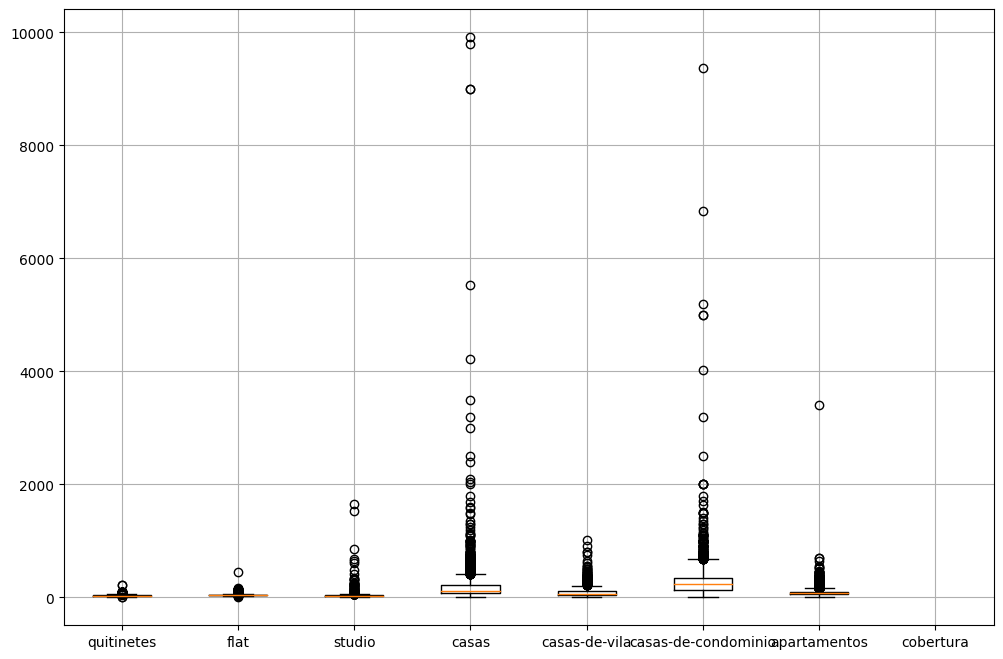

In [4145]:
fig = plt.figure(figsize=(12, 8))
plt.boxplot([data.query('imvl_type == "quitinetes"')['listing.usableAreas'],
             data.query('imvl_type == "flat"')['listing.usableAreas'],
             data.query('imvl_type == "studio"')['listing.usableAreas'],
             data.query('imvl_type == "casas"')['listing.usableAreas'],
             data.query('imvl_type == "casas-de-vila"')['listing.usableAreas'],
             data.query('imvl_type == "casas-de-condominio"')['listing.usableAreas'],
             data.query('imvl_type == "apartamentos"')['listing.usableAreas'],
             data.query('imvl_type == "cobertura"')['listing.usableAreas'], ],
            labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura']
            )
plt.grid()

In [4146]:
for index, item in data[data['listing.usableAreas'] > 2000].iterrows():
    if ('m²' or 'm2') in item['listing.description']:
        print(index, item['listing.description'])

5756 Oportunidade! Conheça esta deslumbrante Casa em condomínio fechado, no alto do Cascatinha, vista panorâmica da cidade e montanhas com 800 de construção e 3.200 de terreno. Muito verde e segurança. Casa com 550 metros de construção sendo sala toda em madeira em 3 ambientes, muito ampla e confortável. Salão com lareira e fino acabamento, com amplas varandas. Suíte com closet,hidro e lareira exclusiva, banheiro social,cozinha planejada e área de serviço. Casa de caseiro com 65m² de construção sendo 2 quartos sendo 1 suíte, sala,cozinha, banheiro social e área de serviço. Área de lazer com 200m² , sendo 2 saunas à seco e vapor. Amplo salão com churrasqueira,fogão a lenha, forno para pizza , bancada com pia. Estudamos permuta!Agende sua visita!
53247 Excelente casa com 04 quartos, toda mobiliada, em condomínio fechado, seguro, tranquilo e com privacidade, estrutura em madeira e alvenaria, em terreno plano de 4.020m²; com pomar repleto de frutas variadas, paisagismo com flores e plantas

In [4147]:
# Altera manualmente

data.at[61114, 'listing.usableAreas'] = 800
data.at[5770, 'listing.usableAreas'] = 800

In [4148]:
for index, item in data[data['listing.usableAreas'] > 1000].iterrows():
    if ('m²' or 'm2' or 'metros' or 'quadrados') in item['listing.description']:
        print(index, item['listing.usableAreas'],item['listing.description'])

5756 3200.0 Oportunidade! Conheça esta deslumbrante Casa em condomínio fechado, no alto do Cascatinha, vista panorâmica da cidade e montanhas com 800 de construção e 3.200 de terreno. Muito verde e segurança. Casa com 550 metros de construção sendo sala toda em madeira em 3 ambientes, muito ampla e confortável. Salão com lareira e fino acabamento, com amplas varandas. Suíte com closet,hidro e lareira exclusiva, banheiro social,cozinha planejada e área de serviço. Casa de caseiro com 65m² de construção sendo 2 quartos sendo 1 suíte, sala,cozinha, banheiro social e área de serviço. Área de lazer com 200m² , sendo 2 saunas à seco e vapor. Amplo salão com churrasqueira,fogão a lenha, forno para pizza , bancada com pia. Estudamos permuta!Agende sua visita!
5772 1500.0 Melhor localização da Fazendinha, rua sem saída ao lado de uma área preservada e maravilhosa, com terreno de 3.500m², localizado na altura do Km 23 da Rodovia Raposo Tavares.<br>Muita charmosa e tranquila, ambientes amplos e c

In [4149]:
data.at[68508, 'listing.usableAreas'] = 700
data.at[67079, 'listing.usableAreas'] = 263
data.at[66818, 'listing.usableAreas'] = 640
data.at[60826, 'listing.usableAreas'] = 411
data.at[58694, 'listing.usableAreas'] = 400
data.at[57700, 'listing.usableAreas'] = 790
data.at[57646, 'listing.usableAreas'] = 800

In [4150]:
data.drop(data.query('`listing.usableAreas` > 1060').index, inplace=True)

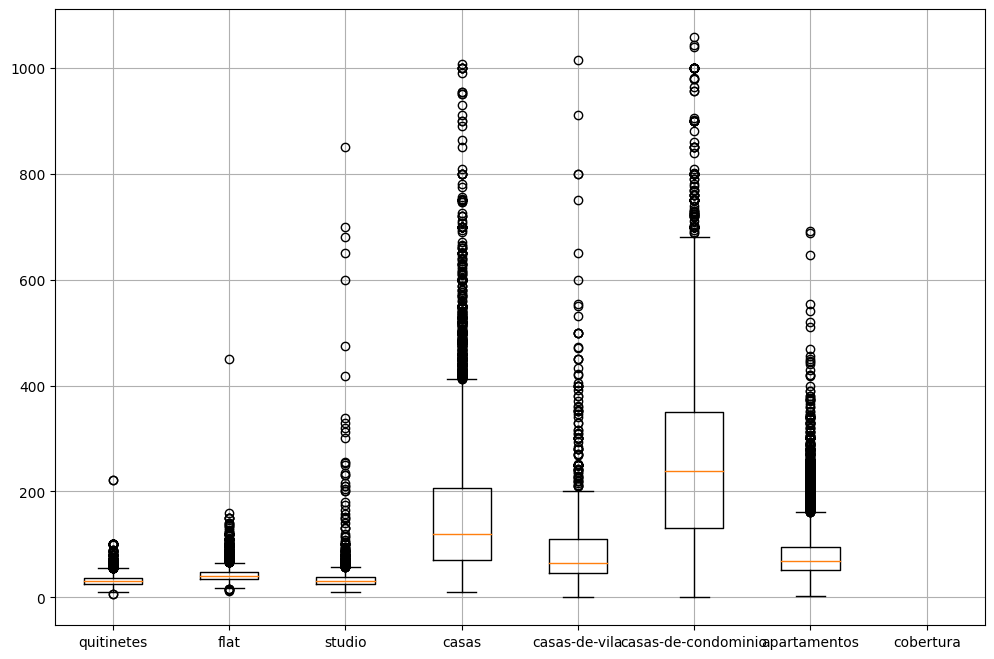

In [4151]:
fig = plt.figure(figsize=(12, 8))
plt.boxplot([data.query('imvl_type == "quitinetes"')['listing.usableAreas'],
             data.query('imvl_type == "flat"')['listing.usableAreas'],
             data.query('imvl_type == "studio"')['listing.usableAreas'],
             data.query('imvl_type == "casas"')['listing.usableAreas'],
             data.query('imvl_type == "casas-de-vila"')['listing.usableAreas'],
             data.query('imvl_type == "casas-de-condominio"')['listing.usableAreas'],
             data.query('imvl_type == "apartamentos"')['listing.usableAreas'],
             data.query('imvl_type == "cobertura"')['listing.usableAreas'], ],
            labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura']
            )
plt.grid()

In [4152]:
data.drop(data.query('imvl_type == "quitinetes" and `listing.usableAreas` > 60').index, inplace=True)

Resultado

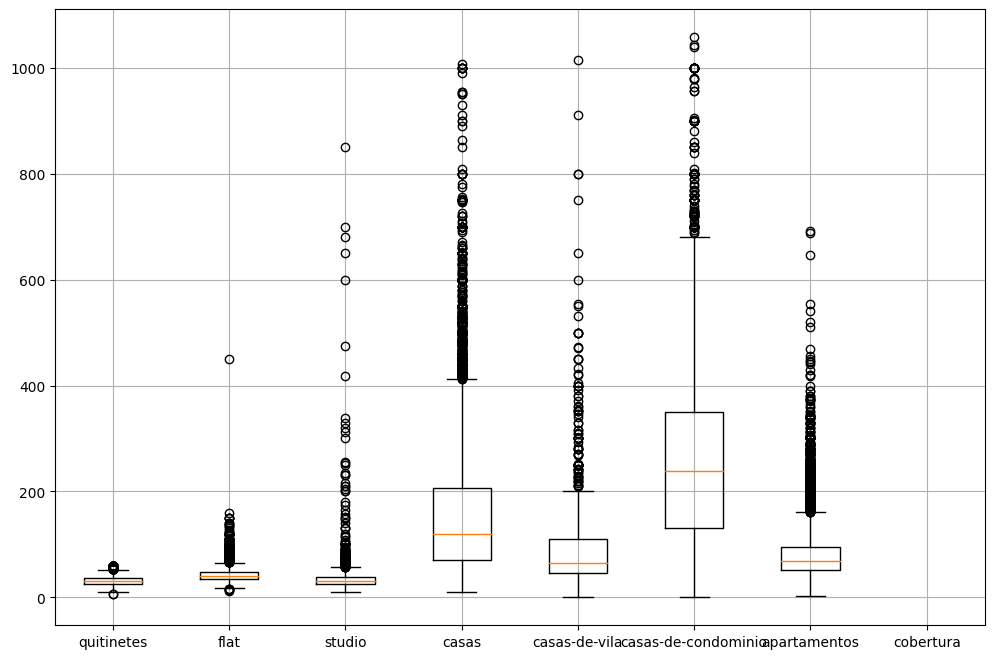

In [4153]:
fig = plt.figure(figsize=(12, 8))
plt.boxplot([data.query('imvl_type == "quitinetes"')['listing.usableAreas'],
             data.query('imvl_type == "flat"')['listing.usableAreas'],
             data.query('imvl_type == "studio"')['listing.usableAreas'],
             data.query('imvl_type == "casas"')['listing.usableAreas'],
             data.query('imvl_type == "casas-de-vila"')['listing.usableAreas'],
             data.query('imvl_type == "casas-de-condominio"')['listing.usableAreas'],
             data.query('imvl_type == "apartamentos"')['listing.usableAreas'],
             data.query('imvl_type == "cobertura"')['listing.usableAreas'], ],
            labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura']
            )
plt.grid()

### IPTU

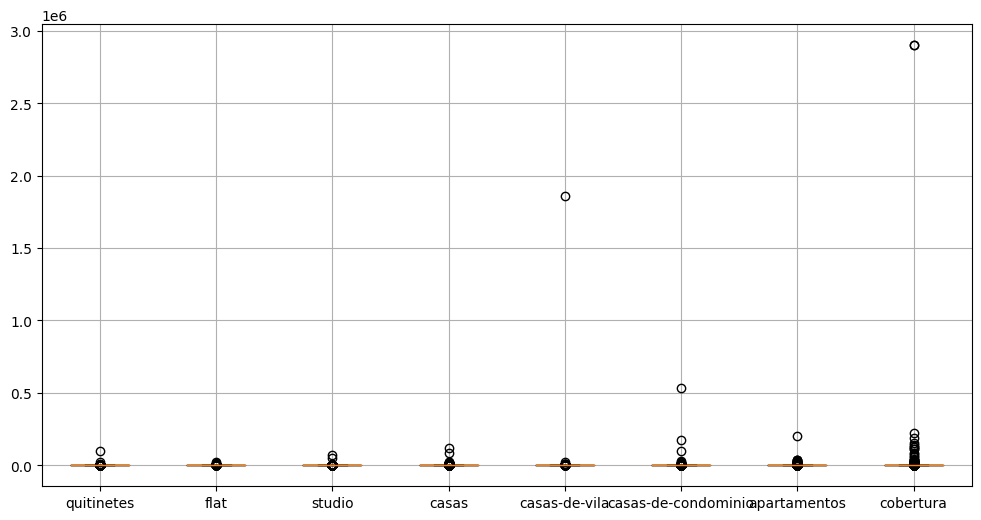

In [4154]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "quitinetes"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "flat"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "studio"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "casas"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "casas-de-vila"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "apartamentos"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "cobertura"')['listing.pricingInfo.yearlyIptu'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()   

In [4155]:
data.drop(data.query('`listing.pricingInfo.yearlyIptu` > 30000').index, inplace=True)

Resultado

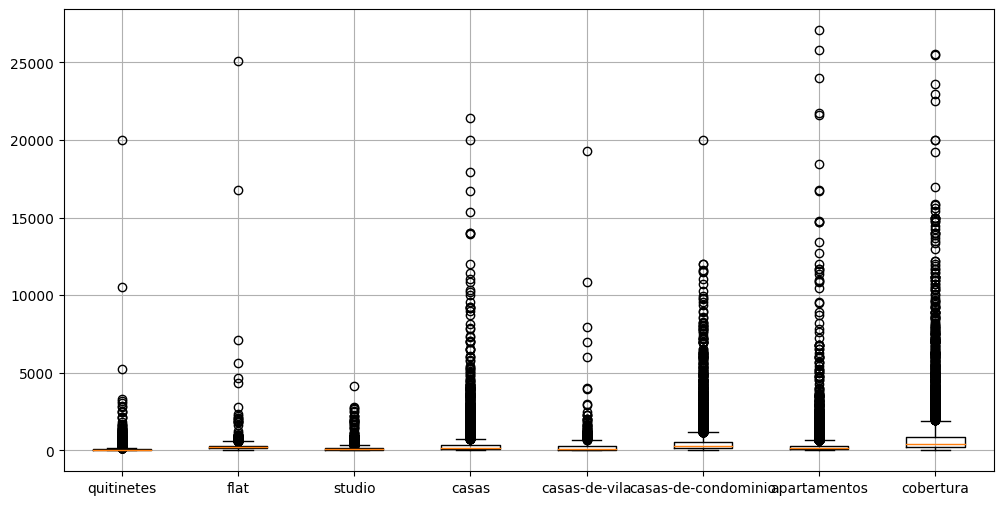

In [4156]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "quitinetes"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "flat"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "studio"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "casas"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "casas-de-vila"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "apartamentos"')['listing.pricingInfo.yearlyIptu'], 
              data[data['listing.pricingInfo.yearlyIptu'].notnull()].query('imvl_type == "cobertura"')['listing.pricingInfo.yearlyIptu'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()   

### Vagas

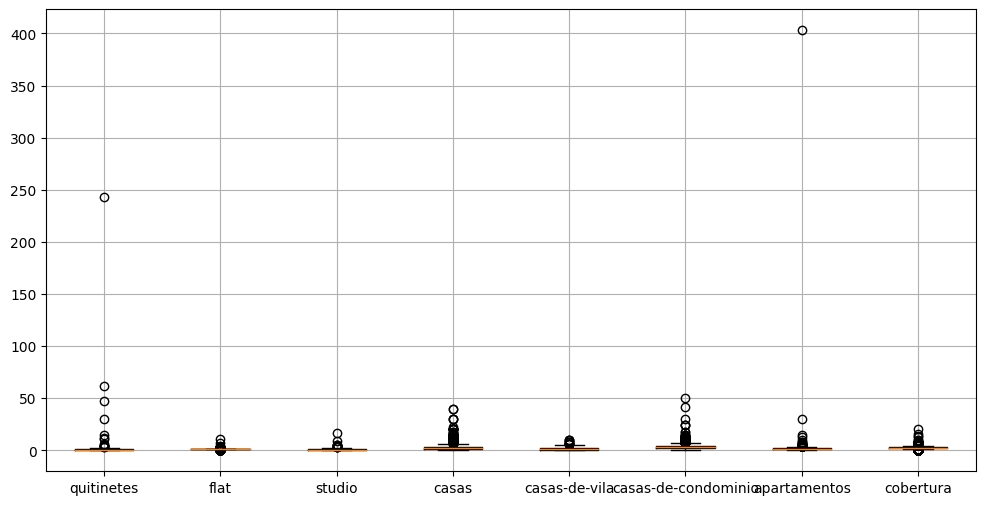

In [4157]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "quitinetes"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "flat"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "studio"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas-de-vila"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "apartamentos"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "cobertura"')['listing.parkingSpaces'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()   

In [4158]:
# data.query('`listing.parkingSpaces` > 40')['listing.description'].values

for index, item in data[data['listing.parkingSpaces'] > 40].iterrows():
    print(index, item['listing.parkingSpaces'],item['listing.description'])

18876 243.0 F&M IMÓVEIS, A SINTONIA CERTA PARA SEU IMÓVEL<br><br>- QMSW 05 - ED. MONT SERRAT<br>- Kitinete em ótima localização, na entrada do sudoeste, composta de:<br><br>*Sala e quarto em vão livre, armário no quarto<br>* Ar condicionado no quarto<br>*Cozinha com frigobar e fogão cooktop;<br>*Tanque de cerâmica;<br>*Banheiro social com box de banheiro<br>*Vaga de garagem no subsolo. 9 vaga nº 243 no subsolo<br><br>Estrutura condominial;<br><br>*Portaria 24hs; *Academia; *Salão de festas com Home Cinema;<br>*Lavanderia terceirizada.<br>- valor do condomínio - 250,00<br>- IPTU/2020 4 cotas de 159,38<br><br>O locatário deverá contratar seguro incêndio para o imóvel.<br><br>Modalidades de garantias aceitas:<br>Fiadores<br>Seguro fiança<br>Título de capitalização<br>Carta fiança (consulte-nos sobre as cartas fiança aceitas)<br><br>*O valor do condomínio está sujeito a alterações e deverá ser verificado pelo interessado junto à administração do edifício.<br><br>Entregamos as chaves de seg

In [4159]:
# Corrigindo manualmente

data.at[19162, 'listing.parkingSpaces'] = 1
data.at[35606, 'listing.parkingSpaces'] = 1

In [4160]:
data.drop(data.query('`listing.parkingSpaces` > 50').index, inplace=True)

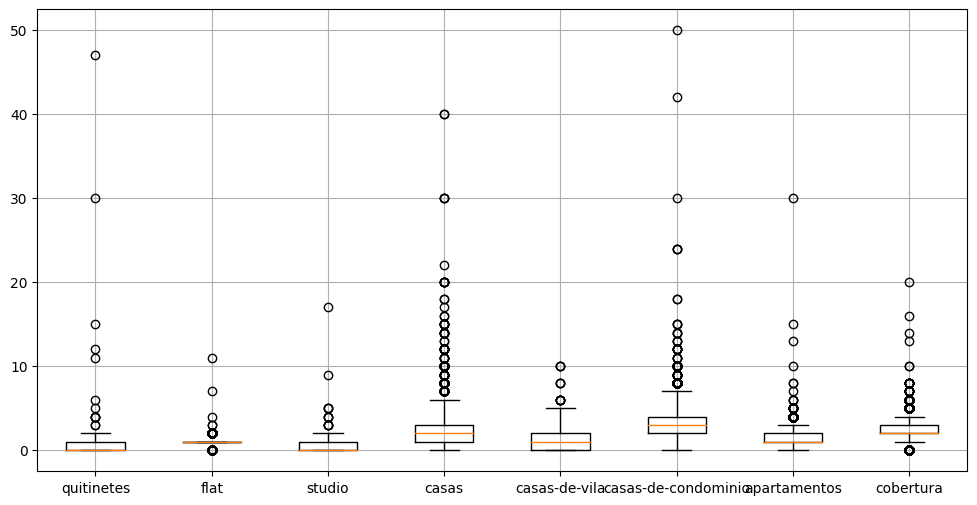

In [4161]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "quitinetes"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "flat"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "studio"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas-de-vila"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "apartamentos"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "cobertura"')['listing.parkingSpaces'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()   

In [4162]:
data.drop(data.query('`listing.parkingSpaces` > 12').index, inplace=True)

Resultado

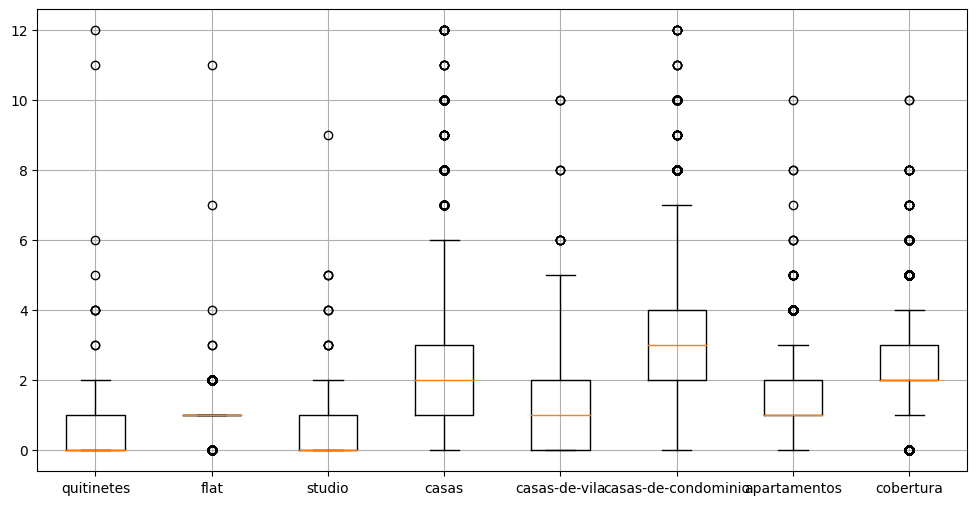

In [4163]:
fig = plt.figure(figsize=(12, 6))
plt.boxplot( [data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "quitinetes"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "flat"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "studio"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas-de-vila"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "casas-de-condominio"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "apartamentos"')['listing.parkingSpaces'], 
              data[data['listing.parkingSpaces'].notnull()].query('imvl_type == "cobertura"')['listing.parkingSpaces'] ],
             labels=['quitinetes', 'flat', 'studio', 'casas', 'casas-de-vila', 'casas-de-condominio','apartamentos', 'cobertura'])
plt.grid()  

## Valores nulos

In [4164]:
data.isnull().sum()

ALUGUEL                                    2
imvl_type                                  2
listing.address.city                       3
listing.address.neighborhood             143
listing.address.state                      5
listing.bathrooms                          5
listing.bedrooms                          39
listing.description                      179
listing.parkingSpaces                   5091
listing.pricingInfo.isSale                 2
listing.pricingInfo.monthlyCondoFee    21762
listing.pricingInfo.yearlyIptu         21450
listing.suites                         10760
listing.usableAreas                        1
listing.usageTypes                         2
dtype: int64

### Condomínio

In [4165]:
# Considerando os valores nulos como sem condominio

data['listing.pricingInfo.monthlyCondoFee'].fillna(0, inplace=True)

### Quartos

In [4166]:
data[data['listing.bedrooms'].isnull()]['listing.description'].values

array(['Casa comercial de esquina com 12 salas, copa, 3 depósitos, 2 lavabos, piso porcelanato, 3 pavimentos. Sol da tarde.<br>O Centro de Floripa é bem estruturado e concentra todos os principais serviços da cidade, além de possuir escolas, restaurantes, shoppings e academias. O terminal do centro - TICEN faz parte dos sistema integrado de transportes de Florianópolis e de lá é possível pegar ônibus para todas as regiões da Ilha, como também para o Continente.',
       'Casa comercial com 327 m²contendo 10 salas, 4 banheiros, piso taco de madeira e 2 vagas de garagem. Ideal para você que deseja abrir ou expandir o seu negócio.<br><br>*** BONIFICAÇÃO DE 1.000,00 nos primeiros 12 meses de locação*** <br><br>O Centro de Floripa é bem estruturado e concentra todos os principais serviços da cidade, além de possuir escolas, restaurantes, shoppings e academias. O terminal do centro - TICEN faz parte dos sistema integrado de transportes de Florianópolis e de lá é possível pegar ônibus para to

In [4167]:
# A maioria dos quartos nulos são imoveis anunciados como comercial então tem salas no lugar de quartos
data.dropna(subset=['listing.bedrooms'], inplace=True)

In [4168]:
data.query('`listing.bedrooms` == 0')['imvl_type'].value_counts()

quitinetes             1260
studio                   12
casas-de-vila             8
flat                      8
apartamentos              2
casas-de-condominio       2
casas                     2
Name: imvl_type, dtype: int64

In [4169]:
# Considera quitinetes studios e flats com valor 0 como 1 quarto
for index, row in data.query('`listing.bedrooms` == 0 and (imvl_type == "quitinetes" or imvl_type == "studio" or imvl_type == "flat")').iterrows():
    data.at[index, 'listing.bedrooms'] = 1

In [4170]:
data.drop(data.query('`listing.bedrooms` == 0').index, inplace=True)

### Banheiros

In [4171]:
data.isna().sum()

ALUGUEL                                    0
imvl_type                                  0
listing.address.city                       1
listing.address.neighborhood             140
listing.address.state                      3
listing.bathrooms                          3
listing.bedrooms                           0
listing.description                      176
listing.parkingSpaces                   5074
listing.pricingInfo.isSale                 0
listing.pricingInfo.monthlyCondoFee        0
listing.pricingInfo.yearlyIptu         21427
listing.suites                         10723
listing.usableAreas                        1
listing.usageTypes                         0
dtype: int64

In [4172]:
data.query('`listing.bathrooms` == 0')['imvl_type'].value_counts().sum()

607

In [4173]:
count = 0
for index, row in data.query('`listing.bathrooms` == 0').iterrows():
    if ("1 BANH" or "UM BANH" or "1 WC" or "UM WC") in row['listing.description'].upper():
        data.at[index, 'listing.bathrooms'] = 1
        count +=1
    if ("2 BANH" or "DOIS BANH" or "2 WC" or "DOIS WC") in row['listing.description'].upper():
        data.at[index, 'listing.bathrooms'] = 2
        count +=1
    if ("3 BANH" or "TRES BANH" or "TRÊS BANH" or "3 WC" or "TRES WC" or "TRÊS WC") in row['listing.description'].upper():
        data.at[index, 'listing.bathrooms'] = 3
        count +=1
    if ("4 BANH" or "QUATRO BANH" or "4 WC" or "QUATRO WC") in row['listing.description'].upper():
        data.at[index, 'listing.bathrooms'] = 4
        count +=1
print(count)

63


In [4174]:
data.dropna(subset=['listing.bathrooms'], inplace=True)

In [4175]:
# Completa os valores 0 com a media do tipo de imovel

for index, row in data.query('`listing.bathrooms` == 0').iterrows():
    type = row['imvl_type']
    mean = data.query('`listing.bathrooms` > 0 and imvl_type == @type')['listing.bathrooms'].mean()
    data.at[index, 'listing.bathrooms'] = int(mean)

In [4176]:
data.isna().sum()

ALUGUEL                                    0
imvl_type                                  0
listing.address.city                       1
listing.address.neighborhood             140
listing.address.state                      3
listing.bathrooms                          0
listing.bedrooms                           0
listing.description                      176
listing.parkingSpaces                   5072
listing.pricingInfo.isSale                 0
listing.pricingInfo.monthlyCondoFee        0
listing.pricingInfo.yearlyIptu         21425
listing.suites                         10720
listing.usableAreas                        0
listing.usageTypes                         0
dtype: int64

### Suites

In [4177]:
data['listing.suites'].isna().sum()

10720

In [4178]:
count = 0
for index, row in data[data['listing.suites'].isnull()].iterrows():
    if ("1 SUIT" or "UMA SUIT" or "UM SUIT" or "1 SUÍT" or "UMA SUÍT" or "UM SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 1
        count +=1
    if ("2 SUIT" or "DOIS SUIT" or "2 SUÍT" or "DOIS SUÍT" or "DUAS SUIT" or "DUAS SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 2
        count +=1
    if ("3 SUIT" or "TRES SUIT" or "TRÊS SUIT" or "3 SUÍT" or "TRES SUÍT" or "TRÊS SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 3
        count +=1
    if ("4 SUIT" or "QUATRO SUIT" or "4 SUÍT" or "QUATRO SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 4
        count +=1
    if ("5 SUIT" or "CINCO SUIT" or "5 SUÍT" or "CINCO SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 5
        count +=1
    if ("6 SUIT" or "SEIS SUIT" or "6 SUÍT" or "SEIS SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 6
        count +=1
print(count)

45


In [4179]:
count = 0
for index, row in data.query('`listing.suites` == 0').iterrows():
    if ("1 SUIT" or "UMA SUIT" or "UM SUIT" or "1 SUÍT" or "UMA SUÍT" or "UM SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 1
        count +=1
    if ("2 SUIT" or "DOIS SUIT" or "2 SUÍT" or "DOIS SUÍT" or "DUAS SUIT" or "DUAS SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 2
        count +=1
    if ("3 SUIT" or "TRES SUIT" or "TRÊS SUIT" or "3 SUÍT" or "TRES SUÍT" or "TRÊS SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 3
        count +=1
    if ("4 SUIT" or "QUATRO SUIT" or "4 SUÍT" or "QUATRO SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 4
        count +=1
    if ("5 SUIT" or "CINCO SUIT" or "5 SUÍT" or "CINCO SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 5
        count +=1
    if ("6 SUIT" or "SEIS SUIT" or "6 SUÍT" or "SEIS SUÍT") in str(row['listing.description']).upper():
        data.at[index, 'listing.suites'] = 6
        count +=1
print(count)

41


In [4180]:
# Corrige os imoveis que contam o banheiro da suite na quantidade de banheiros

count = 0
for index, row in data.query('`listing.suites` > `listing.bathrooms`').iterrows():
    data.at[index, 'listing.bathrooms'] = row['listing.suites']
    count += 1
print(count)

917


In [4181]:
for index, row in data[data['listing.suites'].isnull()].iterrows():
    type = row['imvl_type']
    mean = data.query('`listing.suites` > -1 and imvl_type == @type')['listing.suites'].mean()
    data.at[index, 'listing.suites'] = int(mean)

### Área útil

In [4182]:
data.query('`listing.usableAreas` == 0')

,ALUGUEL,imvl_type,listing.address.city,listing.address.neighborhood,listing.address.state,listing.bathrooms,listing.bedrooms,listing.description,listing.parkingSpaces,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.yearlyIptu,listing.suites,listing.usableAreas,listing.usageTypes
4160,2300.0,casas-de-condominio,São Luís,Olho d'Água,Maranhão,3.0,4.0,"IMPERDIVEL----ALUGA Casa em condomínio, 4 dorm...",3.0,True,0.0,NaN,1.0,0.0,RESIDENTIAL
23561,3300.0,casas-de-condominio,Lauro de Freitas,Miragem,Bahia,4.0,4.0,"casa com 44 sendo 3 suites, cozinha com armari...",2.0,True,0.0,NaN,3.0,0.0,RESIDENTIAL


In [4183]:
data.at[23882, 'listing.usableAreas'] = 44

In [4184]:
data.drop(data.query('`listing.usableAreas` == 0').index, inplace=True)

In [4185]:
data.isna().sum()

ALUGUEL                                    0
imvl_type                                  0
listing.address.city                       1
listing.address.neighborhood             140
listing.address.state                      3
listing.bathrooms                          0
listing.bedrooms                           0
listing.description                      176
listing.parkingSpaces                   5072
listing.pricingInfo.isSale                 0
listing.pricingInfo.monthlyCondoFee        0
listing.pricingInfo.yearlyIptu         21423
listing.suites                             0
listing.usableAreas                        0
listing.usageTypes                         0
dtype: int64

### IPTU

In [4186]:
# Assumindo que os iptu nulos são isentos de iptu

data['listing.pricingInfo.yearlyIptu'].fillna(0, inplace=True)

In [4187]:
data.isna().sum()

ALUGUEL                                   0
imvl_type                                 0
listing.address.city                      1
listing.address.neighborhood            140
listing.address.state                     3
listing.bathrooms                         0
listing.bedrooms                          0
listing.description                     176
listing.parkingSpaces                  5072
listing.pricingInfo.isSale                0
listing.pricingInfo.monthlyCondoFee       0
listing.pricingInfo.yearlyIptu            0
listing.suites                            0
listing.usableAreas                       0
listing.usageTypes                        0
dtype: int64

### Vagas

In [4188]:
# Procurando a quantidade de vagas na descrição

count = 0
for index, row in data[data['listing.parkingSpaces'].isnull()].iterrows():
    if ("1 VAG" or "UMA VAG") in str(row['listing.description']).upper():
        data.at[index, 'listing.parkingSpaces'] = 1
        count +=1
    if ("2 VAG" or "DUAS VAG") in str(row['listing.description']).upper():
        data.at[index, 'listing.parkingSpaces'] = 2
        count +=1
    if ("3 VAG" or "TRES VAG" or "TRÊS VAG") in str(row['listing.description']).upper():
        data.at[index, 'listing.parkingSpaces'] = 3
        count +=1
    if ("4 VAG" or "QUATRO VAG") in str(row['listing.description']).upper():
        data.at[index, 'listing.parkingSpaces'] = 4
        count +=1
    if ("5 VAG" or "CINCO VAG") in str(row['listing.description']).upper():
        data.at[index, 'listing.parkingSpaces'] = 5
        count +=1
    if ("6 VAG" or "SEIS VAG") in str(row['listing.description']).upper():
        data.at[index, 'listing.parkingSpaces'] = 6
        count +=1
print(count)

211


In [4189]:
# Assumindo que as vagas nulas são imoveis sem vagas

data['listing.parkingSpaces'].fillna(0, inplace=True)

In [4190]:
data.isna().sum()

ALUGUEL                                  0
imvl_type                                0
listing.address.city                     1
listing.address.neighborhood           140
listing.address.state                    3
listing.bathrooms                        0
listing.bedrooms                         0
listing.description                    176
listing.parkingSpaces                    0
listing.pricingInfo.isSale               0
listing.pricingInfo.monthlyCondoFee      0
listing.pricingInfo.yearlyIptu           0
listing.suites                           0
listing.usableAreas                      0
listing.usageTypes                       0
dtype: int64

### Estado, cidade e bairro

In [4191]:
data.dropna(subset=['listing.address.city', 'listing.address.state', 'listing.address.neighborhood'], inplace=True)
data.isna().sum()

ALUGUEL                                  0
imvl_type                                0
listing.address.city                     0
listing.address.neighborhood             0
listing.address.state                    0
listing.bathrooms                        0
listing.bedrooms                         0
listing.description                    176
listing.parkingSpaces                    0
listing.pricingInfo.isSale               0
listing.pricingInfo.monthlyCondoFee      0
listing.pricingInfo.yearlyIptu           0
listing.suites                           0
listing.usableAreas                      0
listing.usageTypes                       0
dtype: int64

# Criação dos sets de teste e treino

In [4196]:
data.notnull().sum()

ALUGUEL                                67567
imvl_type                              67567
listing.address.city                   67567
listing.address.neighborhood           67567
listing.address.state                  67567
listing.bathrooms                      67567
listing.bedrooms                       67567
listing.description                    67391
listing.parkingSpaces                  67567
listing.pricingInfo.isSale             67567
listing.pricingInfo.monthlyCondoFee    67567
listing.pricingInfo.yearlyIptu         67567
listing.suites                         67567
listing.usableAreas                    67567
listing.usageTypes                     67567
dtype: int64

In [4197]:
from sklearn.model_selection import train_test_split

data.drop(['listing.description',], axis=1)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# Exploração e analise dos dados

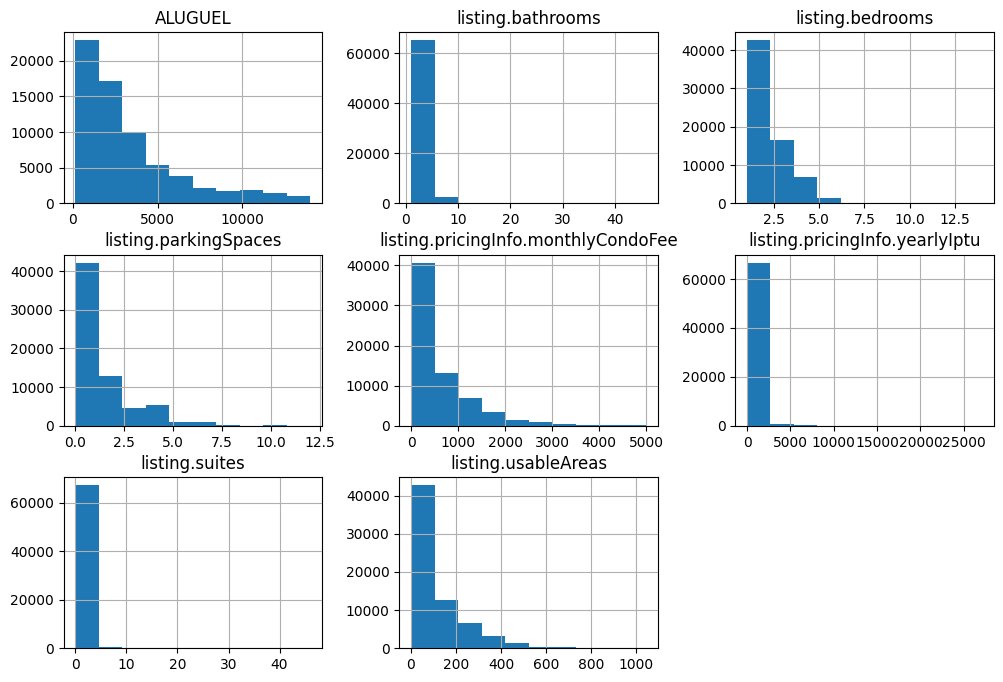

In [4201]:
data.hist(figsize=(12,8))
plt.show()

In [4208]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['ALUGUEL'].sort_values(ascending=False)

ALUGUEL                                1.000000
listing.bathrooms                      0.700410
listing.usableAreas                    0.699076
listing.suites                         0.650935
listing.parkingSpaces                  0.618580
listing.bedrooms                       0.594797
listing.pricingInfo.monthlyCondoFee    0.484236
listing.pricingInfo.yearlyIptu         0.323888
Name: ALUGUEL, dtype: float64